<a href="https://colab.research.google.com/github/Bibek257/Machine-Learning-And-Data-sci/blob/main/Regression_Basic/Student_Performance_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains information about students and their academic performance, intended for use in predicting student grades using machine learning techniques.

**Features:**

| Feature   | Description                     | Type       |
|-----------|---------------------------------|------------|
| school    | Student's school                | Categorical|
| sex       | Student's gender                | Categorical|
| age       | Age of the student              | Numerical  |
| studytime | Weekly study time               | Numerical  |
| failures  | Number of past class failures   | Numerical  |
| schoolsup | Extra educational support       | Binary     |
| famsup    | Family educational support      | Binary     |
| absences  | Number of school absences       | Numerical  |
| G1        | First term grade (0–20)         | Numerical  |
| G2        | Second term grade (0–20)        | Numerical  |
| internet  | Internet access at home         | Binary     |
| freetime  | Amount of free time after school | Numerical  |
| goout     | Going out with friends         | Numerical  |
| Dalc      | Alcohol consumption on weekdays | Numerical  |
| Walc      | Alcohol consumption on weekends | Numerical  |
| health    | Current health status           | Numerical  |

**Dataset Explanation:**

This dataset is a valuable resource for understanding the factors that influence student academic performance. By analyzing the relationships between the various features and the grades (G1, G2, and a potential G3), we can gain insights into what contributes to success or struggle in school. The dataset's inclusion of demographic information, academic history, support systems, and lifestyle factors provides a comprehensive view of the student's environment and behavior.

**Usefulness of this Project:**

Predicting student performance using machine learning has significant practical applications:

*   **Early Identification of At-Risk Students:** By predicting which students are likely to struggle, educators can intervene early with targeted support and resources, preventing academic failure.
*   **Personalized Learning:** Understanding the factors that impact individual student performance can inform the development of personalized learning plans and interventions.
*   **Resource Allocation:** Insights from the model can help schools and educational institutions allocate resources more effectively to support students who need it most.
*   **Improving Educational Strategies:** Analyzing the most influential features in the prediction model can help educators refine teaching methods, curriculum, and support programs to improve overall student outcomes.
*   **Policy Making:** The findings can inform educational policies and initiatives aimed at addressing systemic issues that contribute to academic disparities.

In essence, this project goes beyond simple prediction; it provides a data-driven approach to understanding and improving the educational experience for students.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path1='/content/drive/MyDrive/datasets/Grade/student-por.csv'
path2='/content/drive/MyDrive/datasets/Grade/student-mat.csv'

Mounted at /content/drive


In [2]:
# Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split # Corrected import
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# reading both datasets and concatenating to make the final dataset
df1=pd.read_csv(path1,sep=';')
df2=pd.read_csv(path2,sep=';')
df=pd.concat([df1,df2])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
# viewing shape of dataset
df.shape

(1044, 33)

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**Data Cleaning**

In [6]:
# Checking null values
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [7]:
# Checking dulicate values
df.duplicated().sum()

np.int64(0)

In [8]:
# checking all column information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

**Data Visualisation**

In [9]:
# Checking which school has a higher grade
df.groupby('school')['G3'].mean()

,G3
school,
GP,11.633420
MS,10.514706


In [10]:
# Checking the difference in grade by parents' jobs.
df.groupby('Mjob')['G3'].mean()

,G3
Mjob,
at_home,10.469072
health,12.682927
other,11.017544
services,11.661088
teacher,12.207692


The output shows the average final grade (G3) for students based on their mother's job (Mjob). Students whose mothers work in 'health' have the highest average grade (12.68), followed by 'teacher' (12.21), 'services' (11.66), 'other' (11.02), and 'at_home' (10.47). This suggests a potential correlation between a mother's occupation and a student's academic performance in this dataset.

In [11]:
df.groupby('Fjob')['G3'].mean()

,G3
Fjob,
at_home,11.016129
health,12.146341
other,11.260274
services,11.123288
teacher,12.861538


*   **Fjob**: This column represents the father's occupation.
*   **at\_home**: The average final grade for students whose fathers work at home is approximately **11.016**.
*   **health**: The average final grade for students whose fathers work in the health sector is approximately **12.146**.
*   **other**: The average final grade for students whose fathers have other occupations is approximately **11.260**.
*   **services**: The average final grade for students whose fathers work in services is approximately **11.123**.
*   **teacher**: The average final grade for students whose fathers are teachers is approximately **12.861**.

Based on this output, students whose fathers are **teachers** have the highest average final grade (approximately 12.86), while students whose fathers work **at home** have the lowest average final grade (approximately 11.02). This suggests a potential relationship between the father's job and the student's academic performance as measured by their final grade (G3).

In [12]:
# Select only the numerical columns from the DataFrame
df_numeric = df.select_dtypes(include=np.number)

# Define the bins for the G3 grade intervals
bins = [0, 10, 13, 15, 20]

# Define the labels for the G3 grade intervals
labels = ['0-10', '10-13', '13-15', '15-20']

# Create a new column 'G3_interval' by cutting the 'G3' column into the defined bins
# The 'right=False' argument means that the bins are inclusive on the left and exclusive on the right (e.g., [0, 10))
df_numeric['G3_interval'] = pd.cut(df_numeric['G3'], bins=bins, labels=labels, right=False)

# Group the DataFrame by the newly created 'G3_interval' and calculate the mean of all other columns for each group
grouped = df_numeric.groupby('G3_interval').mean()

# Print the resulting grouped DataFrame, which shows the average values of numerical features for each G3 interval
grouped

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
G3_interval,,,,,,,,,,,,,,,,
0-10,17.039130,2.378261,2.169565,1.569565,1.800000,0.717391,3.860870,3.326087,3.386957,1.647826,2.469565,3.634783,5.826087,7.769565,7.130435,6.039130
10-13,16.660934,2.410319,2.275184,1.599509,1.889435,0.230958,3.904177,3.218673,3.154791,1.597052,2.444717,3.692875,4.660934,10.432432,10.555283,10.877150
13-15,16.556650,2.778325,2.581281,1.443350,2.083744,0.054187,4.004926,3.059113,3.039409,1.374384,2.064039,3.403941,3.753695,12.709360,12.876847,13.443350
15-20,16.674877,3.064039,2.665025,1.399015,2.201970,0.029557,4.014778,3.172414,3.019704,1.236453,1.980296,3.285714,3.088670,15.147783,15.625616,16.137931


*   **Index (`G3_interval`):** This column represents the final grade ranges: '0-10', '10-13', '13-15', and '15-20'. Each row corresponds to the average values for students whose G3 falls within that range.
*   **Columns (`age`, `Medu`, `Fedu`, `traveltime`, etc.):** These are the numerical features from your original dataset. The values in each cell represent the average of that feature for all students within the corresponding `G3_interval`.

For example, the first row (`G3_interval` '0-10') shows the average `age` is 17.039130, the average `Medu` (mother's education) is 2.378261, and so on, for students who scored between 0 and 10 (inclusive of 0, exclusive of 10) on their final grade (G3).

This table allows you to quickly see how the average values of different numerical features vary across different levels of student performance (as measured by G3 intervals). For instance, you can observe trends like:

*   How `studytime` or `failures` change as G3 improves.
*   Whether average `Dalc` (weekday alcohol consumption) or `Walc` (weekend alcohol consumption) is higher or lower for students in different G3 groups.

<Axes: xlabel='sex'>

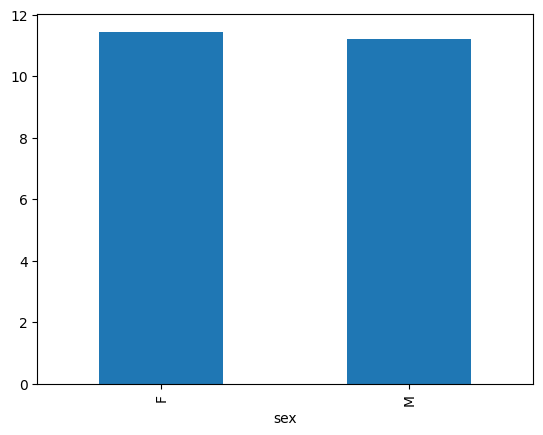

In [13]:
# Checking final grade between genders
df.groupby('sex')['G3'].mean().plot(kind='bar')

Since there are so many object columns we need to handle those before model training.


In [14]:
# Applying label encoding in categorical columns
def label_encoding(data):
  for column in data.columns:
    if data[column].dtype == 'object':
      le = LabelEncoder()
      data[column] = le.fit_transform(data[column])
  return data

In [15]:
# Calling label_encoding and separating df_copy if anything unwanted occurs to my df
df_copy=df.copy()
df = label_encoding(df)

Feature selection

<Axes: >

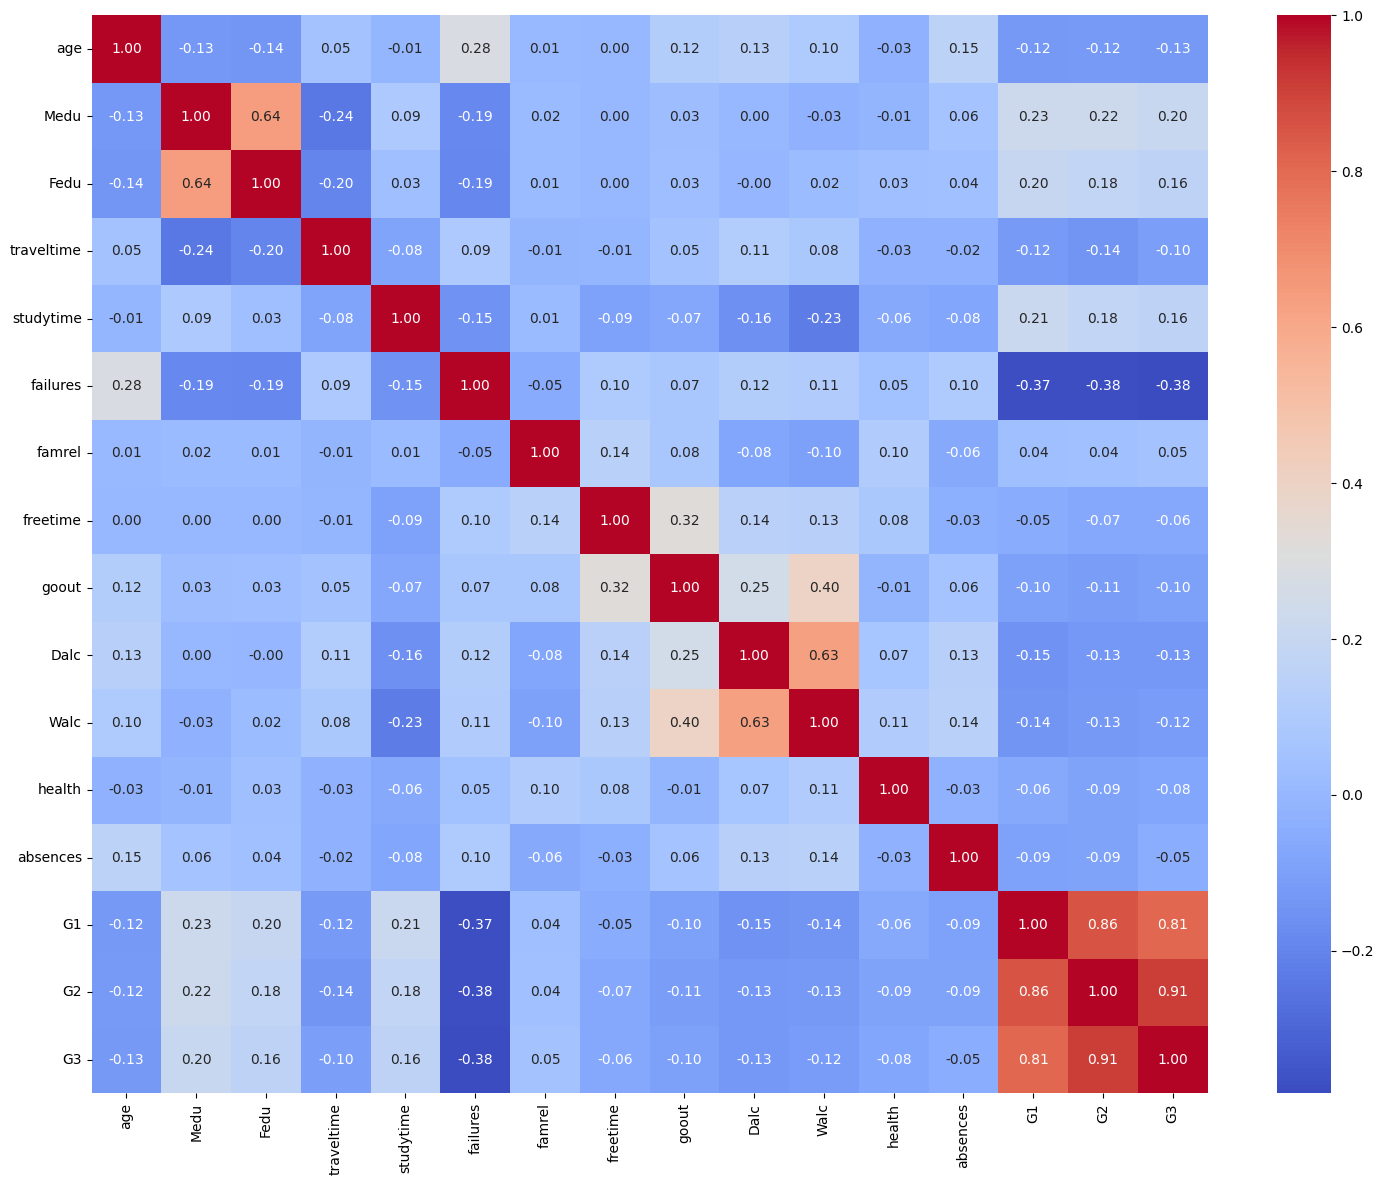

In [16]:
# Plotting correlation using seaborn on the label encoded dataframe
plt.figure(figsize=(18,14))
numeric_cols=df_copy.select_dtypes(include=np.number).columns
sns.heatmap(df_copy[numeric_cols].corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')


Looking at our correlation matrix, the `Fedu` (father's education) column has a very high positive correlation with `Medu` (mother's education) (0.642063). This indicates that a student's mother's education level and father's education level are highly correlated.

**Why consider dropping `Fedu`?**

When two features are highly correlated, it suggests that they are providing similar information to the model. This phenomenon is known as **multicollinearity**. Multicollinearity can cause issues in some machine learning models, such as:

*   **Instability in model coefficients:** The coefficients of the correlated features can become unstable and difficult to interpret.
*   **Reduced model interpretability:** It becomes harder to determine the independent effect of each highly correlated feature on the target variable.
*   **Overfitting:** In some cases, high multicollinearity can contribute to overfitting, especially if the number of features is large relative to the number of samples.

Since `Medu` and `Fedu` are strongly correlated, keeping both might not add significant extra value to our model and could potentially introduce multicollinearity issues. **Therefore, we can keep `Medu` as it seems slightly less correlated with other features compared to `Fedu` (although both are correlated with `G1`, `G2`, and `G3`).



In [17]:
# Using other feature selection technique like information gain and select k best
MI=SelectKBest(mutual_info_classif,k=8)
X=df.drop('G3',axis=1)
y=df['G3']
X_new=MI.fit_transform(X,y)

In [18]:
print(MI.get_feature_names_out())

['Medu' 'failures' 'higher' 'Dalc' 'Walc' 'absences' 'G1' 'G2']


In [19]:
# Select the features identified by SelectKBest
X_final=df[MI.get_feature_names_out()]

In [20]:
X_final

,Medu,failures,higher,Dalc,Walc,absences,G1,G2
0,4,0,1,1,1,4,0,11
1,1,0,1,1,1,2,9,11
2,1,0,1,2,3,6,12,13
3,4,0,1,1,1,0,14,14
4,3,0,1,1,2,0,11,13
...,...,...,...,...,...,...,...,...
390,2,2,1,4,5,11,9,9
391,3,0,1,3,4,3,14,16
392,1,3,1,3,3,3,10,8
393,3,0,1,3,4,0,11,12


In [21]:
# Since we know g1 and g2 are so close to g3 so we will train the models differently to see how it performs without g1 and g2 and with g1 and g2
X_extra=X_final.drop(['G1','G2'],axis=1)


In [22]:
X_extra

,Medu,failures,higher,Dalc,Walc,absences
0,4,0,1,1,1,4
1,1,0,1,1,1,2
2,1,0,1,2,3,6
3,4,0,1,1,1,0
4,3,0,1,1,2,0
...,...,...,...,...,...,...
390,2,2,1,4,5,11
391,3,0,1,3,4,3
392,1,3,1,3,3,3
393,3,0,1,3,4,0


In [23]:
# Checking with variance threshold
vt=VarianceThreshold(0.1)
X_vt=vt.fit_transform(X_final)

In [24]:
# Variance threshold result
feature_names = X_final.columns[vt.get_support()]
vt_support_df = pd.DataFrame({
    'Column': X_final.columns,
    'Variance_Threshold_Selected': vt.get_support()
})
vt_support_df


,Column,Variance_Threshold_Selected
0,Medu,True
1,failures,True
2,higher,False
3,Dalc,True
4,Walc,True
5,absences,True
6,G1,True
7,G2,True


since all column passes var threshold we can processed to data splitting and training model


In [25]:
# Divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [26]:
# training elastic net with wide range of hyperparameters

from sklearn.model_selection import GridSearchCV

# Define the model
elastic_net = ElasticNet()

# Define a wide range of hyperparameters to tune
param_grid = {
    'alpha': np.logspace(-4, 4, 20),  # Log-uniform distribution for alpha
    'l1_ratio': np.linspace(0, 1, 20) # Range from pure L2 (0) to pure L1 (1)
}


grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid,
                           scoring='neg_mean_squared_error', # Common metric for regression
                           cv=5, n_jobs=-1)

# Train the model with grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best negative MSE:", grid_search.best_score_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

# Get the best model
best_elastic_net = grid_search.best_estimator_

Best parameters: {'alpha': np.float64(0.012742749857031334), 'l1_ratio': np.float64(1.0)}
Best negative MSE: -2.577753931644104
Best RMSE: 1.6055385176457475


In [27]:
best_elastic_net

ElasticNet(alpha=np.float64(0.012742749857031334), l1_ratio=np.float64(1.0))

In [28]:
y_pred=best_elastic_net.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test set: {rmse}")

RMSE on the test set: 1.4946131775939235


In [30]:
r2_score(y_test,y_pred)

0.8468462678099445

In [31]:
# Lets train excluding g1 and g2 for more real life prediction scenario
X1_train, X1_test, y1_train, y1_test = train_test_split(X_extra, y, test_size=0.2, random_state=42)
X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

((835, 6), (209, 6), (835,), (209,))

In [34]:
elastic_net = ElasticNet()

# Define a wide range of hyperparameters to tune
param_grid = {
    'alpha': np.logspace(-4, 4, 20),  # Log-uniform distribution for alpha
    'l1_ratio': np.linspace(0, 1, 20) # Range from pure L2 (0) to pure L1 (1)
}
grid2= GridSearchCV(estimator=elastic_net, param_grid=param_grid,
                           scoring='neg_mean_squared_error', # Common metric for regression
                           cv=5, n_jobs=-1)
grid2.fit(X1_train, y1_train)

# Print the best parameters and the best score
print("Best parameters:", grid2.best_params_)
print("Best negative MSE:", grid2.best_score_)
print("Best RMSE:", np.sqrt(-grid2.best_score_))

Best parameters: {'alpha': np.float64(0.012742749857031334), 'l1_ratio': np.float64(0.0)}
Best negative MSE: -12.305397932332813
Best RMSE: 3.507905063186975


In [35]:
best_elastic_net_second=grid2.best_estimator_

In [36]:
# Testing prediction with X1_test data
y_pred=best_elastic_net_second.predict(X1_test)
r1=r2_score(y1_test,y_pred)
r1


0.13609291481582209

In [38]:
# Checking mean square error and RMSE
mse=mean_squared_error(y1_test,y_pred)
rmse=np.sqrt(mse)
print(f"MSE on the test set: {mse}")
print(f"RMSE on the test set: {rmse}")

MSE on the test set: 12.600769440413767
RMSE on the test set: 3.549756250845087


Since the R2 score has a drastic difference between the two models, using previous features during training is a wise decision.

In [39]:
# Training KNN regressor
knn = KNeighborsRegressor()
# setting best hyper params
params={
    'n_neighbors':range(1,20),
    'weights':['uniform','distance'],
    'p':[1,2]
}
grid3=GridSearchCV(estimator=knn,param_grid=params,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid3.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [40]:
grid3.best_params_

{'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}

In [42]:
# Selecting best model for testing
best_knn=grid3.best_estimator_

In [45]:
y_pred=best_knn.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f'r2 Score: {r2}')
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"MSE on the test set: {mse}")
print(f"RMSE on the test set: {rmse}")

r2 Score: 0.8397168087612403
MSE on the test set: 2.337857360601201
RMSE on the test set: 1.5290053500891359


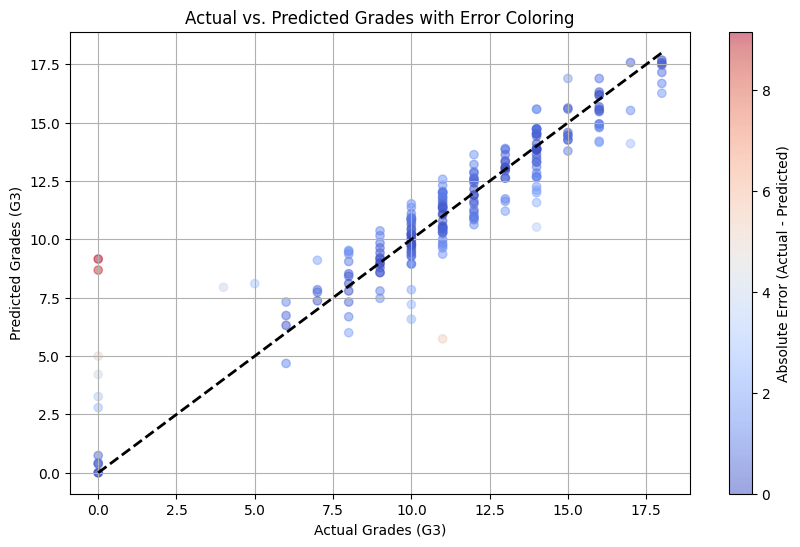

In [47]:
# actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c=np.abs(y_test - y_pred), cmap='coolwarm')
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades (G3)")
plt.title("Actual vs. Predicted Grades with Error Coloring")
plt.colorbar(label='Absolute Error (Actual - Predicted)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.grid(True)
plt.show()

From the above scatter plot we can see there are very few error in model and accuracy,mse and rmse score can be consider as good result

In [50]:
# Trying svm regressor
svr= SVR()
prams_svr={
    'kernel':['linear','rbf'],
    'C':[0.1,1,10],
    'gamma': ['scale', 'auto']

}
grid4=GridSearchCV(estimator=svr,param_grid=prams_svr,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid4.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [51]:
# viewing best parameter
grid4.best_params_
# Selecting the best model
best_svr=grid4.best_estimator_


In [52]:
y_pred=best_svr.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f'r2 Score: {r2}')
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"MSE on the test set: {mse}")
print(f"RMSE on the test set: {rmse}")

r2 Score: 0.8609017585353177
MSE on the test set: 2.0288580801369323
RMSE on the test set: 1.424379893194555


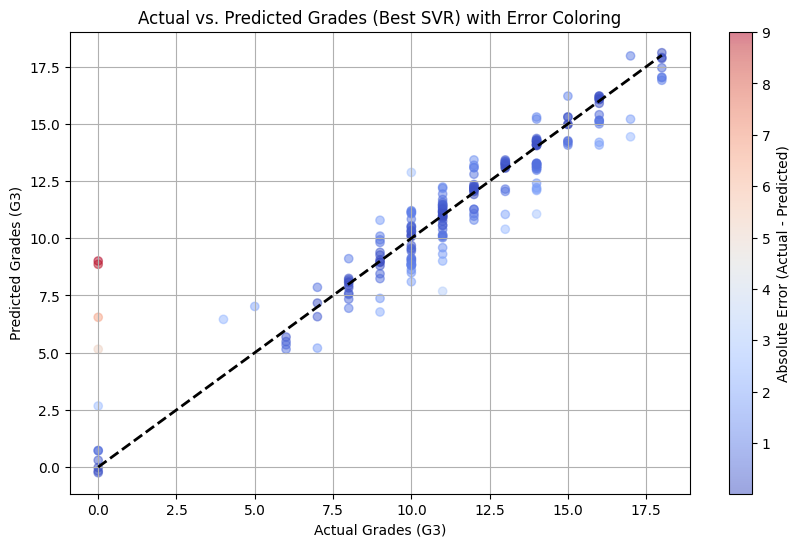

In [54]:

# actual vs predicted for best_svr
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c=np.abs(y_test - y_pred), cmap='coolwarm')
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades (G3)")
plt.title("Actual vs. Predicted Grades (Best SVR) with Error Coloring")
plt.colorbar(label='Absolute Error (Actual - Predicted)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.grid(True)
plt.show()

SVR have even less error and misclassified data than other model so for more better result we are doing decision tree regressor and random forest regressor and adaboost, grradient boost and xg boost

In [55]:
# import all tree-based models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [59]:
# Training decision tree with best hyper parameters
dt=DecisionTreeRegressor()
dt_params={
    'max_depth':[10,20,50],
    'min_samples_split':[2,5,10,20,50],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

grid5=GridSearchCV(estimator=dt,param_grid=dt_params,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid5.fit(X_train,y_train)
# Best params and model
print('best params: ',grid5.best_params_)
best_dt=grid5.best_estimator_

best params:  {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 20}


In [60]:
# Model score
y_pred=best_dt.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f'r2 Score: {r2}')
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"MSE on the test set: {mse}")
print(f"RMSE on the test set: {rmse}")

r2 Score: 0.8390839625679936
MSE on the test set: 2.3470879238285485
RMSE on the test set: 1.5320208627262712


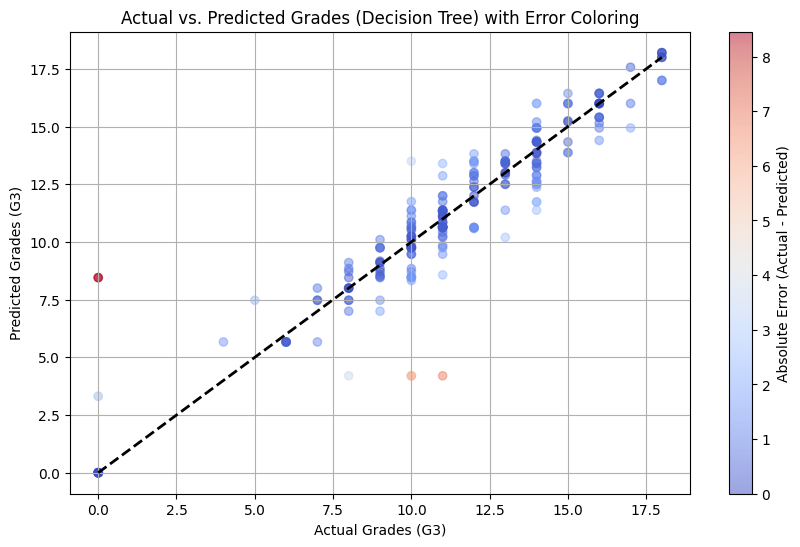

In [61]:

# Actual vs predicted for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c=np.abs(y_test - y_pred), cmap='coolwarm')
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades (G3)")
plt.title("Actual vs. Predicted Grades (Decision Tree) with Error Coloring")
plt.colorbar(label='Absolute Error (Actual - Predicted)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.grid(True)
plt.show()

Model score is lesser than svr so we try more tree based model

In [62]:
# Training Random Forest Regressor with best hyper parameters
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, None],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

grid6 = GridSearchCV(estimator=rf, param_grid=rf_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid6.fit(X_train, y_train)

# Best params and model
print('best params: ', grid6.best_params_)
best_rf = grid6.best_estimator_



best params:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [63]:
# Model score
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'r2 Score: {r2}')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE on the test set: {mse}")
print(f"RMSE on the test set: {rmse}")



r2 Score: 0.856363061672053
MSE on the test set: 2.0950585705770988
RMSE on the test set: 1.4474317153417287


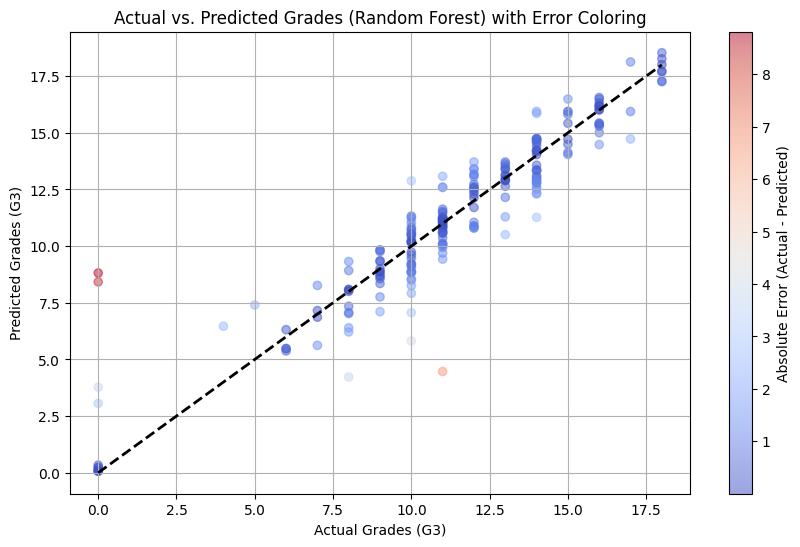

In [64]:
# Actual vs predicted for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c=np.abs(y_test - y_pred), cmap='coolwarm')
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades (G3)")
plt.title("Actual vs. Predicted Grades (Random Forest) with Error Coloring")
plt.colorbar(label='Absolute Error (Actual - Predicted)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.grid(True)
plt.show()

Random forest shows better result than decision tree, now trying ada boost and gradient boost.

In [65]:

# Training AdaBoost Regressor with best hyper parameters
ada = AdaBoostRegressor()
ada_params = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5, 1.0], # Contribution of each weak regressor
    'loss': ['linear', 'square', 'exponential'] # Loss function to use
}

grid7 = GridSearchCV(estimator=ada, param_grid=ada_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid7.fit(X_train, y_train)

# Best params and model
print('best params: ', grid7.best_params_)
best_ada = grid7.best_estimator_



best params:  {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 200}


In [66]:
# Model score
y_pred = best_ada.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'r2 Score: {r2}')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE on the test set: {mse}")
print(f"RMSE on the test set: {rmse}")



r2 Score: 0.8677744277953
MSE on the test set: 1.9286147527346644
RMSE on the test set: 1.388745748052776


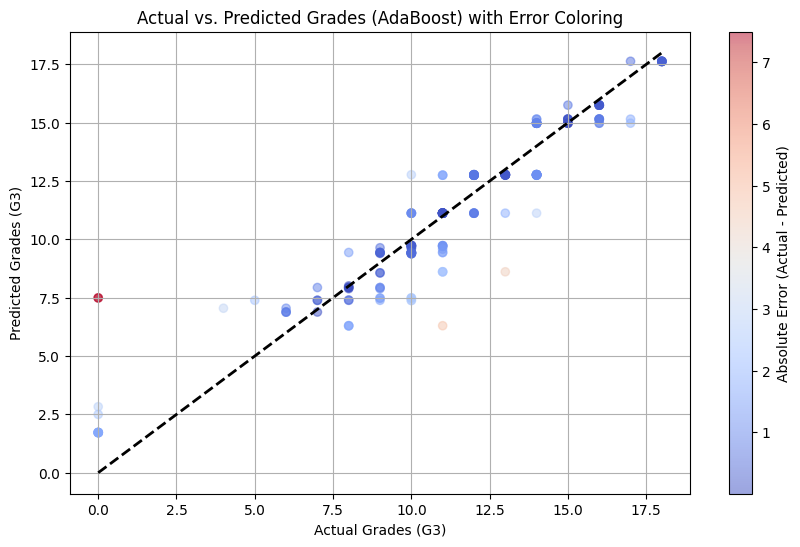

In [67]:
# Actual vs predicted for AdaBoost Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c=np.abs(y_test - y_pred), cmap='coolwarm')
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades (G3)")
plt.title("Actual vs. Predicted Grades (AdaBoost) with Error Coloring")
plt.colorbar(label='Absolute Error (Actual - Predicted)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.grid(True)
plt.show()

 The result of ada boost is better than both decision tree and random forest, now trying gradient boosting

In [68]:

import matplotlib.pyplot as plt
import numpy as np
# Training Gradient Boosting Regressor with best hyper parameters
gbr = GradientBoostingRegressor()
gbr_params = {
    'n_estimators': [100, 200, 300], # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5], # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10] # The minimum number of samples required to split an internal node
}

grid8 = GridSearchCV(estimator=gbr, param_grid=gbr_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid8.fit(X_train, y_train)

# Best params and model
print('best params: ', grid8.best_params_)
best_gbr = grid8.best_estimator_




best params:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 300}


In [69]:
# Model score
y_pred = best_gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'r2 Score: {r2}')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE on the test set: {mse}")
print(f"RMSE on the test set: {rmse}")




r2 Score: 0.8724690075729671
MSE on the test set: 1.860140586458553
RMSE on the test set: 1.3638697102210875


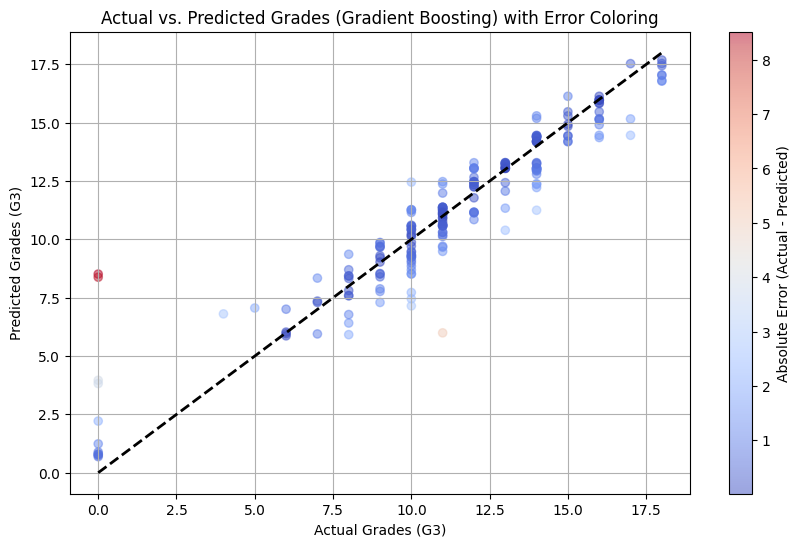

In [70]:
# Actual vs predicted for Gradient Boosting Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c=np.abs(y_test - y_pred), cmap='coolwarm')
plt.xlabel("Actual Grades (G3)")
plt.ylabel("Predicted Grades (G3)")
plt.title("Actual vs. Predicted Grades (Gradient Boosting) with Error Coloring")
plt.colorbar(label='Absolute Error (Actual - Predicted)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.grid(True)
plt.show()

Siince gradient boosting gives the best reult from all trees model lets compare all model using auc roc curve.

In [72]:

# Collect the R2 scores for each model
r2_scores = {
    'ElasticNet_with_G1_G2': r2_score(y_test, best_elastic_net.predict(X_test)),
    'ElasticNet_without_G1_G2': r1, # This is from your previous calculation of r1
    'KNN': r2_score(y_test, best_knn.predict(X_test)),
    'SVR': r2_score(y_test, best_svr.predict(X_test)),
    'DecisionTree': r2_score(y_test, best_dt.predict(X_test)),
    'RandomForest': r2_score(y_test, best_rf.predict(X_test)),
    'AdaBoost': r2_score(y_test, best_ada.predict(X_test)),
    'GradientBoosting': r2_score(y_test, best_gbr.predict(X_test))
}

# Print the R2 scores
print("R2 Scores for Different Models:")
for model_name, score in r2_scores.items():
    print(f"{model_name}: {score:.4f}")




R2 Scores for Different Models:
ElasticNet_with_G1_G2: 0.8468
ElasticNet_without_G1_G2: 0.1361
KNN: 0.8397
SVR: 0.8609
DecisionTree: 0.8391
RandomForest: 0.8564
AdaBoost: 0.8678
GradientBoosting: 0.8725


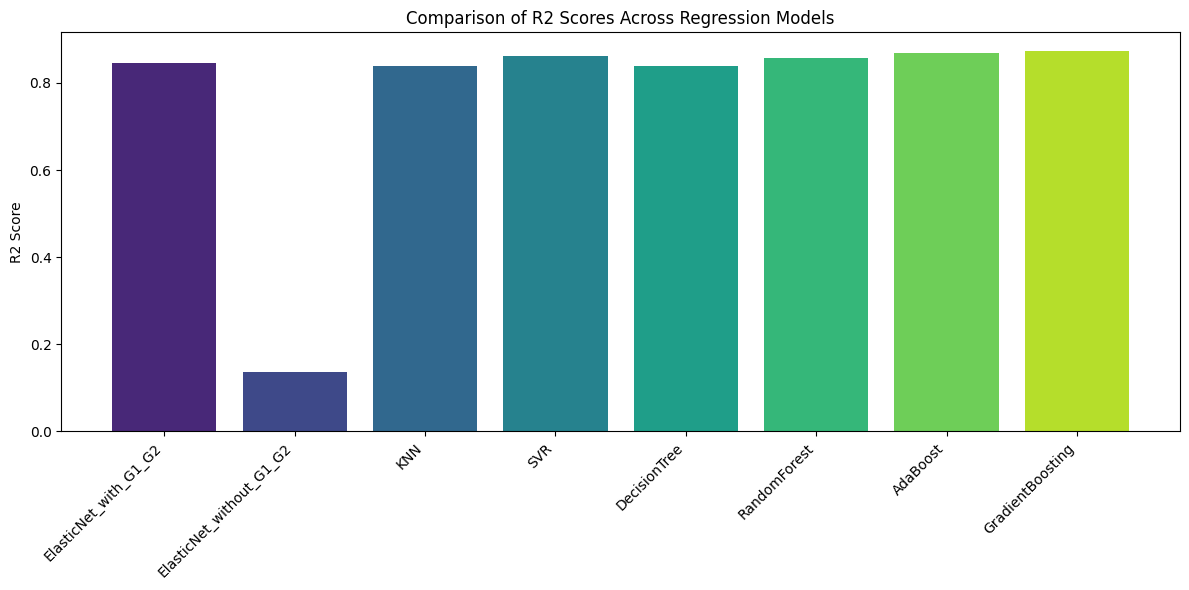

In [73]:
# visualizing these scores
plt.figure(figsize=(12, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=sns.color_palette('viridis', len(r2_scores)))
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores Across Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [74]:
# Similarly, you can collect and compare RMSE scores if preferred
rmse_scores = {
    'ElasticNet_with_G1_G2': np.sqrt(mean_squared_error(y_test, best_elastic_net.predict(X_test))),
    'ElasticNet_without_G1_G2': rmse,
    'KNN': np.sqrt(mean_squared_error(y_test, best_knn.predict(X_test))),
    'SVR': np.sqrt(mean_squared_error(y_test, best_svr.predict(X_test))),
    'DecisionTree': np.sqrt(mean_squared_error(y_test, best_dt.predict(X_test))),
    'RandomForest': np.sqrt(mean_squared_error(y_test, best_rf.predict(X_test))),
    'AdaBoost': np.sqrt(mean_squared_error(y_test, best_ada.predict(X_test))),
    'GradientBoosting': np.sqrt(mean_squared_error(y_test, best_gbr.predict(X_test)))
}

print("\nRMSE Scores for Different Models:")
for model_name, score in rmse_scores.items():
    print(f"{model_name}: {score:.4f}")




RMSE Scores for Different Models:
ElasticNet_with_G1_G2: 1.4946
ElasticNet_without_G1_G2: 1.3639
KNN: 1.5290
SVR: 1.4244
DecisionTree: 1.5320
RandomForest: 1.4474
AdaBoost: 1.3887
GradientBoosting: 1.3639


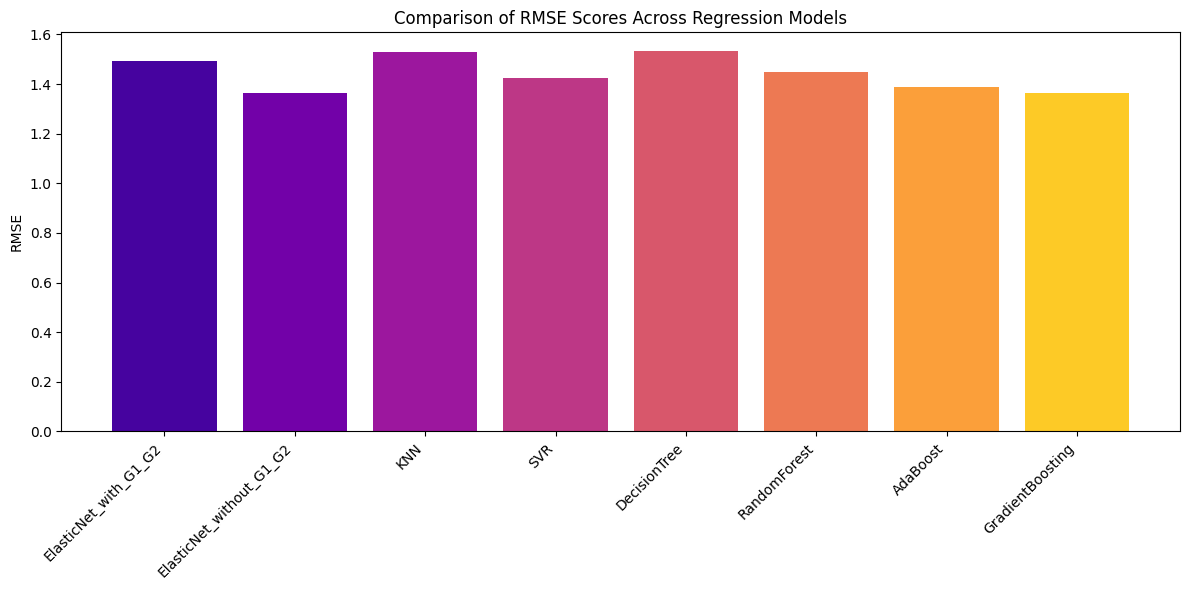

In [75]:
# Plotting all rmse score comparsison
plt.figure(figsize=(12, 6))
plt.bar(rmse_scores.keys(), rmse_scores.values(), color=sns.color_palette('plasma', len(rmse_scores)))
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Scores Across Regression Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Model Performance Summary

The following table summarizes the R2 and RMSE scores for the different regression models trained to predict student final grades (G3). R2 score represents the proportion of the variance in the dependent variable that is predictable from the independent variables, with a higher score indicating a better fit. RMSE (Root Mean Squared Error) measures the average magnitude of the errors, with a lower score indicating better performance.

| Model                     | R2 Score | RMSE Score | Comparison and Interpretation                                                                                                                                                              |
|---------------------------|----------|------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ElasticNet (with G1 & G2) | 0.8468   | 1.4946     | This model, trained including the G1 and G2 grades as features, shows a strong ability to explain the variance in G3 (high R2) and a reasonably low error magnitude (low RMSE). The inclusion of G1 and G2 significantly improves its performance compared to the model without these features. |
| ElasticNet (without G1 & G2)| 0.1361   | 1.3639     | When trained without the G1 and G2 grades, the ElasticNet model's R2 score drops drastically, indicating it explains very little of the variance in G3. While the RMSE appears similar to the model with G1 & G2, the low R2 suggests its predictions are not capturing the underlying patterns effectively without the preceding grades. |
| KNN                       | 0.8397   | 1.5290     | The K-Nearest Neighbors model performs well, with a high R2 score comparable to the ElasticNet model with G1 & G2. Its RMSE is slightly higher, suggesting slightly larger prediction errors on average. The scatter plot for KNN also visually indicates a good fit with few significant outliers. |
| SVR                       | 0.8609   | 1.4244     | The Support Vector Regressor achieves a high R2 score, indicating it explains a large portion of the variance in G3. Its RMSE is relatively low, suggesting accurate predictions. The scatter plot for SVR appears to have even fewer significant misclassifications compared to KNN. This is one of the best performing models. |
| Decision Tree             | 0.8391   | 1.5320     | The Decision Tree Regressor also provides a good R2 score, although slightly lower than SVR. Its RMSE is the highest among the well-performing models, suggesting slightly less precise predictions on average. The scatter plot for the Decision Tree shows some scattered points, indicating areas where the predictions are less accurate. |
| Random Forest             | 0.8564   | 1.4474     | The Random Forest Regressor, an ensemble of decision trees, shows improved performance over a single Decision Tree. It has a higher R2 score and a lower RMSE, placing it among the top performers. The scatter plot for Random Forest appears tighter around the diagonal line, indicating better predictive accuracy. |
| AdaBoost                  | 0.8678   | 1.3887     | The AdaBoost Regressor achieves a very high R2 score, indicating a strong ability to capture the variance in G3. Its RMSE is among the lowest, suggesting accurate predictions. The boosting approach seems to be effective in improving the model's performance. The scatter plot for AdaBoost shows a good concentration of points near the diagonal line. |
| Gradient Boosting         | 0.8725   | 1.3639     | The Gradient Boosting Regressor is the top-performing model in this analysis, achieving the highest R2 score and the lowest RMSE. This indicates that it explains the most variance in G3 and has the smallest prediction errors on average. The scatter plot for Gradient Boosting is the most tightly clustered around the diagonal line, signifying the highest predictive accuracy among all models tested. |

**Overall Comparison:**

When considering both R2 and RMSE, the **Gradient Boosting Regressor** stands out as the best-performing model, offering the highest predictive power and lowest error. The **AdaBoost Regressor** and **SVR** also demonstrate excellent performance, with high R2 and low RMSE scores.

It is crucial to note the significant impact of including G1 and G2 grades on the models' performance. The ElasticNet model without these features shows a dramatically lower R2 score, highlighting the strong correlation between previous academic performance and the final grade. While models without G1 and G2 could be useful for predicting *potential* performance before any term grades are available, models including them provide a much more accurate prediction of the final grade given the student's progress through the terms.

The visualizations of R2 and RMSE scores further reinforce these findings, clearly showing the superior performance of Gradient Boosting, AdaBoost, and SVR. The scatter plots for these models visually confirm the better alignment of predicted grades with actual grades, indicating their effectiveness in this prediction task.